# IronData - Week 3
    1. Learning how to process (transform) non-numerical
    2. Train test-split for the target dataset

## 1. Learning how to process (transform) non-numerical

# 1.08 Activity 1

Do you think it is important to reduce the number of categories in a column if you can? How might it impact your model?

   * It's useful to reduce the categories from columns where there are too many and it's difficult to read. "blue, navy blue, light blue and yellow" To > "blue and yellow"
   * **IMPORTANT:** If we have a column that only has one category and one value we should delete it.

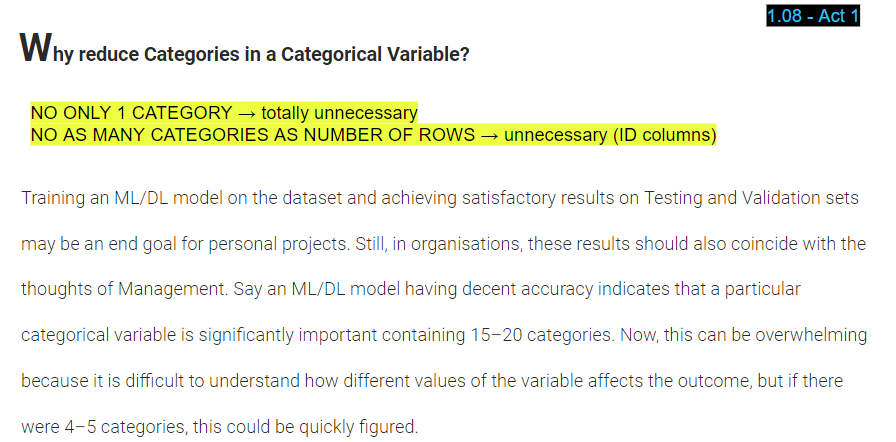

# 1.08 Activity 2

Difference between One Hot Encoding, Label Encoding, and Ordinal Encoding.

   * **One Hot Encoding:** Boolean. 0 or 1.
   * **Label Encoding:** We assign a range of numbers for each category.
   * **Ordinal Encoding (ordered encoding):** From an ordered list, we assign an ordered number.

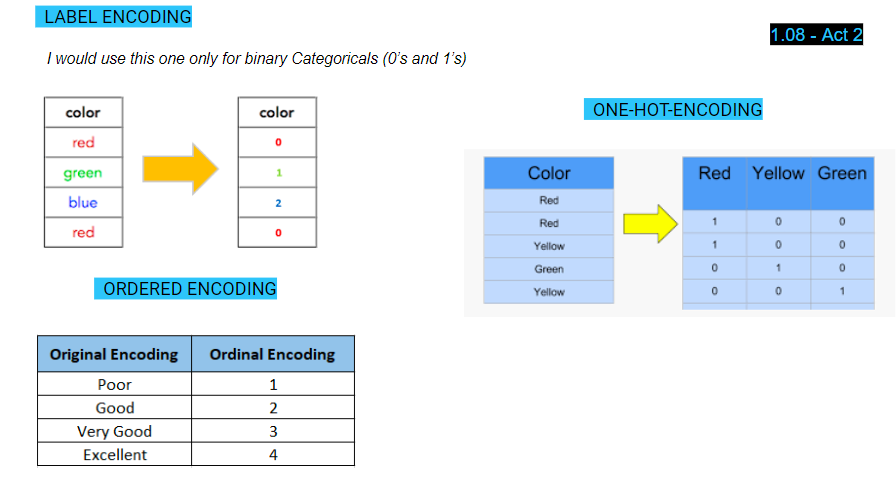

# 1.08 Activity 3

Check the difference between MSE and RMSE. Which one is bigger? Does it matter? Read this [article](https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables) and let's discuss it in class.

**MSE**: Mean Squared Error:

   * How well a model fits the datapoins.
   * Also, when we draw a line or use a model to predict a value, the mean squared error tells us how close the predicted values are to the actual data points.
   * It is calculated by taking the difference between the actual value and the predicted value, squaring the difference (to make it positive, since the differences could be negative or positive), and then taking the average of all these squared differences. A lower mean squared error means the line or model fits the data better.

There is another measure of accuracy called "adjusted R-square". How is this different from R-square?
    
**RMSE**: Root Mean Squared Error: **it's the most common one**

   * It is a way to measure the difference between numbers that are in the data.
   * We take the difference between each number in the dataset, squarem them (to make them possitive) add them together and then take the square root.
    
Which one is better?: 

   * With RMSE we do the square root.
    
There is another measure of accuracy called "adjusted R-square". How is this different from R-square?
**Adjusted R-square**:

   * How close your data fits a line or curve, and it ranges from 0 to 1.
   * In simple terms, the r2 value basically depicts how correlated a certain trend is, which means how related two variables are. 

# 1.08 Activity 4

1. List down some examples/problems that can be solved using **regression models**:
    * E.g `Housing price prediction`. Also; sales, growth, market evaluation, customer demand.
    * The target has to be specific. Units needs to be `continuos`
2. List down some examples/problems that can be solved using **classification models**:
    * E.g `Email SPAM`. Predict either it's spam or not... Also, if a `review` is positive or negative.
    * Either is one thing or not. Boolean.
3. List down some examples/problems that can be solved using **clustering models:**
    * Anything that needs to be find structure out of unlabeled data.
    * E.g: `Is this a cat?` Music recommendation based on previous data, etc.,
    In clustering you divide data into multiple groups, but you don't know what those groups will be beforehand, so you don't get a specific response. For a specific response, you'd do regression/classification. ~ Sabina, DAPT TA
    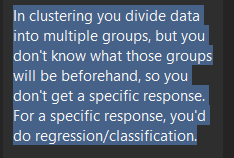
    

- There is a file `files_for_activities/sites_with_free_data_sets.pdf`. You can use that to find some examples on different models.

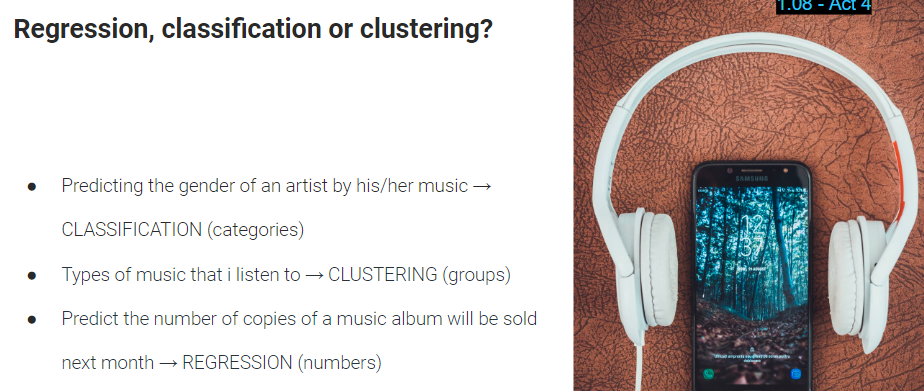

### What's  `Overfit`?
**ELI5:** The adjusted is more sensitive when we have overfit

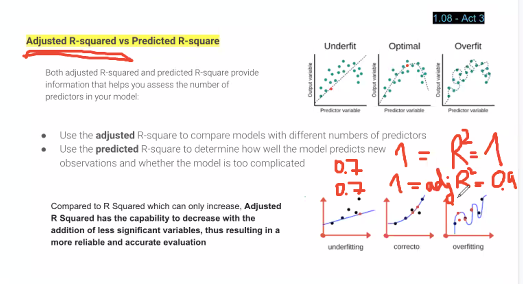

## 2. Train test-split for the target dataset

### Coding Best Practices

In [1]:
import pandas as pd # data manipulation and analysis
import numpy as np # mathematical operations
# Specific. sklearn is a ["superCool" ~ Xisca] Machine Larning Library.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Lastly... no more warnings... HURRAY !!!!
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining our functions:

def explore_data():
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)

def cc(): # cleaning columns
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

### Reading data

In [3]:
data = pd.read_csv('regression_data.csv') # Then, we open the data
data.sample(5) # We could have also used .head(), tails.(), etc.,

AVGGIFT   HV1_log  IC1_transformed  IC5_transformed  gender  TARGET_D
3674  14.090909  6.204558        15.742430         4.146631  Female      10.0
3255   8.571429  6.821107        16.899492         4.196843    Male       9.0
271    9.727273  6.343880        14.871192         4.163242  Female      15.0
3779   5.111111  6.869014        15.831783         4.180721    Male      11.0
2181  22.200000  7.751475        16.563527         4.197549    Male      30.0

### Exploring the Data

In [4]:
explore_data() # First impression of our data

The dataframe shape is (4670, 6) .
 
The dataframe columns are:
Index(['AVGGIFT', 'HV1_log', 'IC1_transformed', 'IC5_transformed', 'gender',
       'TARGET_D'],
      dtype='object')
 
The dataframe data types are:
AVGGIFT            float64
HV1_log            float64
IC1_transformed    float64
IC5_transformed    float64
gender              object
TARGET_D           float64
dtype: object


In [5]:
# "how can we see the different categories we find in gender?"
data['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [6]:
# Also:
data['gender'].value_counts()

Female    2664
Male      1895
U          111
Name: gender, dtype: int64

### Cleaning the Data

In [7]:
cc()

Index(['avggift', 'hv1_log', 'ic1_transformed', 'ic5_transformed', 'gender',
       'target_d'],
      dtype='object')



In [8]:
print("The following columns are numerical")
num = data.select_dtypes(include= np.number).fillna(0) # We also deal with NaN values
print(num.columns)
print()
print("The following columns are categorical")
cat = data.select_dtypes(exclude=np.number).fillna("")
print(cat.columns)

The following columns are numerical
Index(['avggift', 'hv1_log', 'ic1_transformed', 'ic5_transformed', 'target_d'], dtype='object')

The following columns are categorical
Index(['gender'], dtype='object')


In [9]:
data.sample(10) # we print a larger sample to see the changes, checking for NaN values or any other error

avggift   hv1_log  ic1_transformed  ic5_transformed  gender  target_d
2151   4.826087  6.431331        14.203473         4.191294  Female       5.0
605   11.538462  8.612503        16.481587         4.279490    Male      35.0
2861  15.333333  8.278174        17.780679         4.274265  Female      18.0
84     9.118235  7.363914        15.449846         4.072703    Male      14.0
2876  35.000000  7.037906        20.049813         4.264622  Female      50.0
1507   3.250000  7.683404        17.447321         4.291999    Male      10.0
912    7.153846  6.350886        14.333128         4.124849    Male      12.0
818    9.428571  6.018593        13.127173         4.120477    Male      15.0
514    4.142857  5.755742        13.177405         4.121329  Female       4.0
1910   5.500000  7.338238        14.770546         4.191180    Male       5.0

### Splitting data (X-y split)

In [10]:
# watch out when is the best time for you to do the splits
y = data['target_d']
X = data.drop(['target_d'], axis=1)
X.sample(5)

avggift   hv1_log  ic1_transformed  ic5_transformed  gender
573   16.352941  7.189168        16.741117         4.219997       U
4149  11.444444  6.467699        12.948532         4.120540  Female
3269   4.500000  6.287859        12.604293         4.139727  Female
3551   4.848485  6.285998        16.077015         4.172972  Female
2663  12.928571  5.549076        14.354526         4.153234    Male

### IMPORTANT: A. Encoding Categoricals

In [11]:
# Tip to take numericals and categories separately
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(exclude = np.number)

#### Option 1: Encoding with Get_dummies

In [12]:
X_dumm = pd.get_dummies(X_cat, drop_first=True) # You can put X, not separating variables is needed.
X_dumm

gender_Male  gender_U
0               1         0
1               1         0
2               0         0
3               1         0
4               0         0
...           ...       ...
4665            1         0
4666            1         0
4667            0         0
4668            1         0
4669            1         0

[4670 rows x 2 columns]

#### Option 2: Encoding with OneHotEncoder

In [13]:
# in case you need to use the encode somewhere else besides your notebook:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

# after the .fit()
{'Male': [1,0],
'Female': [0,0],
'U': [0,1]}

encoded = encoder.transform(X_cat).toarray() 
cat_encoded = pd.DataFrame(encoded)
#encoder.categories_
#cat_encoded.columns = encoder.categories_[0][1:] A more complicated way of assigning the column names
cat_encoded.columns = ['Male','U']
cat_encoded

Male    U
0      1.0  0.0
1      1.0  0.0
2      0.0  0.0
3      1.0  0.0
4      0.0  0.0
...    ...  ...
4665   1.0  0.0
4666   1.0  0.0
4667   0.0  0.0
4668   1.0  0.0
4669   1.0  0.0

[4670 rows x 2 columns]

In [27]:
X = pd.concat([X_num, cat_encoded], axis=1)
X.sample(5)

avggift   hv1_log  ic1_transformed  ic5_transformed  Male    U
3338  11.800000  6.261492        14.627447         4.146053   1.0  0.0
3213  12.214286  7.032624        17.491501         4.259030   0.0  0.0
3776   8.000000  5.998937        12.494862         4.122658   1.0  0.0
2693  18.333333  8.080237        20.272595         4.264423   0.0  0.0
2381  15.000000  7.548029        17.131851         4.261744   1.0  0.0

### IMPORTANT: B. Train-test split

In [28]:
# We transform X and Y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.3, random_state=42)
# Before transforming and preprocessing data (remark)

In [29]:
len(X_dumm)*0.7

3269.0

In [30]:
len(X_test) #How many rows

1401

In [31]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We have our training sets

LinearRegression()

In [32]:
#Some checks on splitted data
#len (X)
#len(X_train)
#len(X_test)
#X_train.head()

## C. Predict on test data

##### How much money they will give?

In [33]:
predictions = model.predict(X_test)

In [34]:
predictions

array([15.19212054, 15.19212054, 15.19212054, ..., 15.68189189,
       15.19212054, 15.68189189])

In [35]:
y_test # we will compare the predictions with the y_test

1714    11.0
2481    12.0
3646    21.0
4139     6.0
4062    30.0
        ... 
1538    20.0
1522    12.0
3026    15.0
2676    10.0
1006    11.0
Name: target_d, Length: 1401, dtype: float64

In [36]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(-0.002523359934950342, 13.382222646632279, 179.08388296403785)

#### Same but maybe more beautiful and easy to understand

In [37]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  -0.002523359934950342
RMSE =  13.382222646632279
MSE =  179.08388296403785


In [38]:
data['target_d'].describe()

count    4670.000000
mean       15.449722
std        12.256023
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: target_d, dtype: float64

###### IMPORTANT: to make predictions on the new data, we have to process the data (X features) in the same way.

In [39]:
# Remember how linear model works in the backend¶
[[15.5, 7.8, 17.3, 4.1, 0, 1], [...], ]

y = (0.7x1) + (1.3x2) + ... + 8.2 = prediction

SyntaxError: invalid syntax (2145559123.py, line 4)